First example gets all FHIR Observations for patient with id of 6

In [3]:
import requests
api_url = "http://localhost:32783/fhir/r4/Observation?patient=6"
response = requests.get(api_url)
# response.json()

Send example uses python libraries for FHIR and searches for Observations for a patient with id of 6 and LOINC code 38483-4 Creatinine [Mass/volume] in Blood

In [2]:
from fhirpy import SyncFHIRClient
from fhir.resources.observation import Observation
client = SyncFHIRClient(url='http://localhost:32783/fhir/r4', extra_headers={})

# find the patient via identifer - patient id will vary by instance

patients_resources = client.resources('Patient')
pats = patients_resources.search(identifier='https://github.com/synthetichealth/synthea|3e36b31d-3c32-43b4-b016-b46a90c2e50f')
patient = pats.first()

# find the observations for the patient

obx_resources = client.resources('Observation')
results = obx_resources.search(patient=patient.id, code='38483-4')
first_result = results.first()

if first_result is not None:
    obxs = Observation.model_validate(first_result.serialize())
    print(obxs.code.coding[0].display)

for i in results:
    #formatted_number = "%.2f" % i.valueQuantity.value,3
    print(round(i.valueQuantity.value,3), '\t' , i.effectiveDateTime)



Creatinine
3.403 	 2011-03-01T02:28:07+00:00
3.024 	 2012-02-29T02:28:07+00:00
2.926 	 2013-02-28T02:28:07+00:00
2.805 	 2014-02-28T02:28:07+00:00
3.413 	 2015-02-28T02:28:07+00:00
3.184 	 2016-02-28T02:28:07+00:00
3.378 	 2017-02-27T02:28:07+00:00
3.411 	 2018-02-27T02:28:07+00:00
3.288 	 2019-02-27T02:28:07+00:00
3.143 	 2020-02-27T02:28:07+00:00


Same example but this time using a graph to plot the results

Creatinine


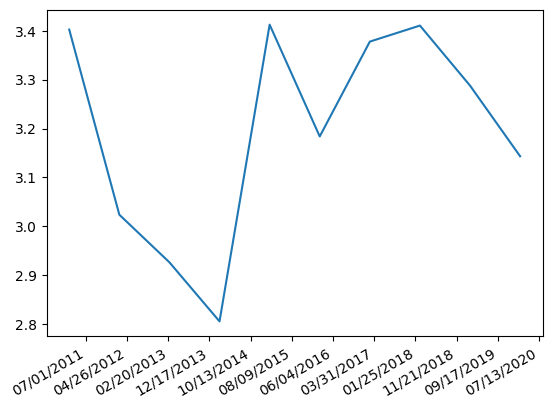

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

try:
    dates = []
    values = []
    for i in results:
        dates += [dt.datetime.fromisoformat(i.effectiveDateTime)]
        values += [i.valueQuantity.value]
    xpoints = np.array(dates)
    ypoints = np.array(values)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
    plt.tick_params(axis='x', labelrotation=45)
    plt.plot(xpoints, ypoints)
    plt.gcf().autofmt_xdate()
    if hasattr(obxs, 'code') and hasattr(obxs.code, 'coding') and len(obxs.code.coding) > 0:
        print(obxs.code.coding[0].display)
    else:
        print("Required FHIR resource properties not found")


    plt.show()

except NameError as e:
    print("Error: FHIR Observation resource not properly initialized")
except Exception as e:
    print(f"An error occurred: {str(e)}")
